# Tutorial 3: Manual Feature Extraction/Engineering

---

### Introduction

In this notebook, we will extract/engineer features using traditional statistical methods, including:

- discrete Laplacian
- gaussian_gradient_magnitude
- generic_gradient_magnitude

First we import some libraries for data manipulation (pandas) mathematical operations (numpy), image processing (scipy) and plotting (pyplot) :

In [1]:
import matplotlib.pyplot as plt # for plotting data/graphs
import numpy as np # For handling N-DIMENSIONAL ARRAYS
import pandas as pd # for importing data into data frame format

from scipy import ndimage, misc # ndimage: contains various functions for multidimensional image processing
                               # misc: Various utilities that don’t have another home.
import matplotlib.pyplot as plt # to draw images


---

### Reading in data

In [2]:
# Import custom data processing function from galaxy_mnist.py (in this folder)
from galaxy_mnist import GalaxyMNISTHighrez

dataset_train = GalaxyMNISTHighrez(
    root='data_import/data',
    download=True,
    train=True  # by default, or False for canonical test set
)
# for the testing data
dataset_test = GalaxyMNISTHighrez(
    root='data_import/data',
    download=True,
    train=False  # by default, or False for canonical test set
)

In [3]:
# Define inputs and labels (targets) for training and testing
images_train = dataset_train.data
images_test = dataset_test.data
labels_train = dataset_train.targets
labels_test = dataset_test.targets


---

### Pre-processing 

In [4]:
#  A predefined function to pre-process the data as we did in Tutorial 1
# (source.pre.py is a file in this directory)
from source.pre import pre_processing 

In [5]:
# pre-processing(data, size) function takes two arguments
# 1. data: the image data to be processed
# 2. The width of resized images (images are square, so width=height).
images_trainPre = pre_processing(images_train, 112)
images_testPre = pre_processing(images_test, 112)

In [6]:
# Print number and size of pre-processed images
images_trainPre.shape

(8000, 112, 112)

Displaying images after pre-processing

label: smooth_round


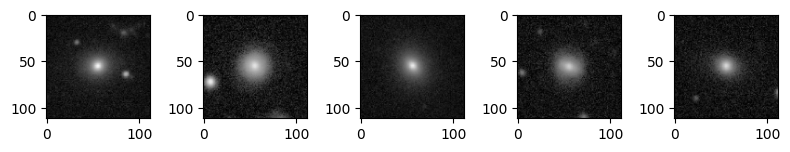

label: smooth_cigar


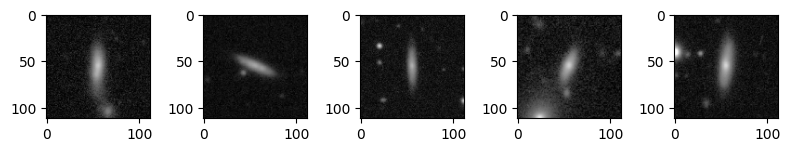

label: edge_on_disk


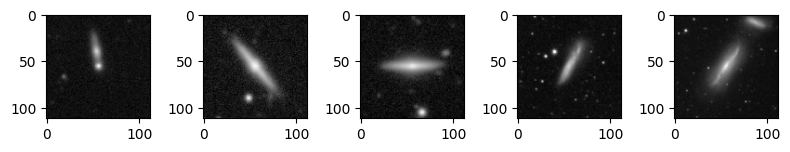

label: unbarred_spiral


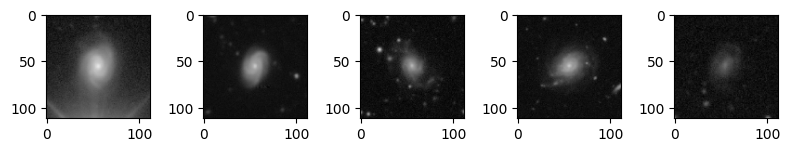

In [7]:
rows = 1
columns = 5
for j in range(len(GalaxyMNISTHighrez.classes)):
    fig = plt.figure(figsize=(8, 8))# Figure is 8 inches by 8 inches
    for i in range (columns):    # Create images in each column
        train_image = images_trainPre[(labels_train == j)][i]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(train_image*255,cmap='gray', vmin=0, vmax=255) 
                            # we have to multiply the image by 255 to restore the original values
    print("label: "+str(GalaxyMNISTHighrez.classes[j]))
    plt.tight_layout()
    plt.show() 

---

### Feature Engineering

In this section, we will try to use manual tools to engineer the input images. The aim is to highlight features in the images that can be detected easily by classical machine learning tools. Notice that this step is being done automatically in deep learning tools.
More information on these tools can be found [here](https://docs.scipy.org/doc/scipy/reference/ndimage.html)

#### Discrete Laplacian [(documentation)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.laplace.html)
The discrete Laplacian transforms the image to highlight the image regions which are darkest and brightest.

In the following code we display images of galaxies of different types before and after application of the discrete Laplacian.

In [ ]:
rows = 1
columns = 5
for j in range(len(GalaxyMNISTHighrez.classes)):
    fig = plt.figure(figsize=(8, 8))# Figure is 8 inches by 8 inches
    for i in range (columns):    # Create images in each column
        train_image = images_trainPre[(labels_train == j)][i]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(train_image*255,cmap='gray', vmin=0, vmax=255) 
                            # we have to multiply the image by 255 to restore the original values
    print("Original: "+str(GalaxyMNISTHighrez.classes[j]))
    plt.tight_layout()
    plt.show() 
    
    fig = plt.figure(figsize=(8, 8))# Figure is 8 inches by 8 inches
    for i in range (columns):    # Create images in each column
        pre_image = ndimage.laplace(images_trainPre[(labels_train == j)][i] ,mode = 'nearest'  )*255*200 # can we highlight the difference better than this
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(pre_image,cmap='gray', vmin=0, vmax=255) 
                            # we have to multiply the image by 255 to restore the original values
    print("pre_image: "+str(GalaxyMNISTHighrez.classes[j]))
    plt.tight_layout()
    plt.show() 
    print("        ______________________________________________________________________________     ")
    

The above images show that the discrete Laplacian filtering does not do a good job of distinguishing between smooth_cigar and edge_on_disk.  However, it does a great job of bringing out the spiral arms in unbarred_spiral.

### Other filtering options 
Two other filters that can be used are:
* gaussian_gradient_magnitude[(documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_gradient_magnitude.html#scipy.ndimage.gaussian_gradient_magnitude): This filter brings out edges (i.e. rapid transitions from light to dark)
* generic_gradient_magnitude[(documentation)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.generic_gradient_magnitude.html): Similar to Gaussian gradient magnitude

### Exercise:  
Implement these two filters and display images (you may reuse and modify the code that was used for discrete Laplacian)

---

#### **_Save the data that you think will give the best performance_**